# Import important library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
                        
import warnings 
warnings.filterwarnings(action= 'ignore')
import geopandas as gpd
import shapefile as shp

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point
sns.set_style('whitegrid')

# Statewise Testing Data

In [2]:
df_test=pd.read_csv("D:\downloads\StatewiseTestingDetails.csv")
df_test

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


# Handling The Null Value

In [3]:
df_test1=df_test[df_test['Positive'].isnull()==True]
df_test2=df_test1[~ (df_test1['Negative'].isnull()==True)]
df_test2

,Date,State,TotalSamples,Negative,Positive
576,2020-08-11,Andhra Pradesh,2592619.0,2348070,NaN
577,2020-08-12,Andhra Pradesh,2649767.0,2395621,NaN
578,2020-08-13,Andhra Pradesh,2705459.0,2441317,NaN
579,2020-08-14,Andhra Pradesh,2758485.0,2485400,NaN
580,2020-08-15,Andhra Pradesh,2812197.0,2530380,NaN
...,...,...,...,...,...
15838,2021-08-06,Uttarakhand,6443888.0,6101552,NaN
15839,2021-08-07,Uttarakhand,6466339.0,6123965,NaN
15840,2021-08-08,Uttarakhand,6483473.0,6141081,NaN
15841,2021-08-09,Uttarakhand,6505490.0,6163067,NaN


converting data type from object to numeric

In [4]:
df_test2['Positive']= pd.to_numeric(df_test2['Positive'])
df_test2['Negative']= pd.to_numeric(df_test2['Negative'])
df_test2['TotalSamples']= pd.to_numeric(df_test2['TotalSamples'])

In [5]:
df_test2['Positive']=df_test2['TotalSamples']-df_test2['Negative']
df_test3=df_test[df_test['Positive'].isnull()==False]
df_test3

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
15976,2020-08-16,West Bengal,1314772.0,NaN,116498.0
15977,2020-08-17,West Bengal,1347091.0,NaN,119578.0
15978,2020-08-18,West Bengal,1382198.0,NaN,122753.0
15981,2020-08-21,West Bengal,1487844.0,NaN,132364.0


In [6]:
df_test2

,Date,State,TotalSamples,Negative,Positive
576,2020-08-11,Andhra Pradesh,2592619.0,2348070,244549.0
577,2020-08-12,Andhra Pradesh,2649767.0,2395621,254146.0
578,2020-08-13,Andhra Pradesh,2705459.0,2441317,264142.0
579,2020-08-14,Andhra Pradesh,2758485.0,2485400,273085.0
580,2020-08-15,Andhra Pradesh,2812197.0,2530380,281817.0
...,...,...,...,...,...
15838,2021-08-06,Uttarakhand,6443888.0,6101552,342336.0
15839,2021-08-07,Uttarakhand,6466339.0,6123965,342374.0
15840,2021-08-08,Uttarakhand,6483473.0,6141081,342392.0
15841,2021-08-09,Uttarakhand,6505490.0,6163067,342423.0


# Drop Unimportant Feature

In [7]:
df_test4= pd.concat([df_test2,df_test3])
df_test4=df_test4.drop(['Negative'], axis=1)


In [8]:
df_test5=df_test4.groupby(['State']).sum().reset_index()
df_test5

,State,TotalSamples,Positive
0,Andaman and Nicobar Islands,7.791334e+07,1763591.0
1,Andhra Pradesh,4.355976e+09,364332578.0
2,Arunachal Pradesh,1.244622e+08,8674884.0
3,Assam,5.497623e+07,2065991.0
4,Bihar,2.729166e+07,1859345.0
5,Chandigarh,9.953694e+07,10931020.0
6,Chhattisgarh,1.906780e+07,467857.0
7,Dadra and Nagar Haveli and Daman and Diu,6.324267e+06,224199.0
8,Delhi,5.044400e+07,6848173.0
9,Goa,7.264547e+06,266181.0


# Feature Engineering

In [9]:
df_test5['positive_rate']=df_test5['Positive']/df_test5['TotalSamples']
df9=df_test5[['State','positive_rate']]
df10=df9.sort_values(by='positive_rate', ascending=False)
df10

,State,positive_rate
32,Uttar Pradesh,0.400978
19,Maharashtra,0.195944
8,Delhi,0.135758
30,Telangana,0.128820
25,Puducherry,0.117298
5,Chandigarh,0.109819
17,Ladakh,0.107814
16,Kerala,0.087313
1,Andhra Pradesh,0.083640
29,Tamil Nadu,0.082224


In [10]:
fp=r'D:\downloads\Indian_states.shp'
map_df = gpd.read_file(fp) 
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


<AxesSubplot:>

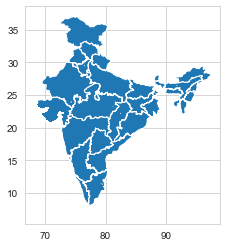

In [11]:
map_df.plot()

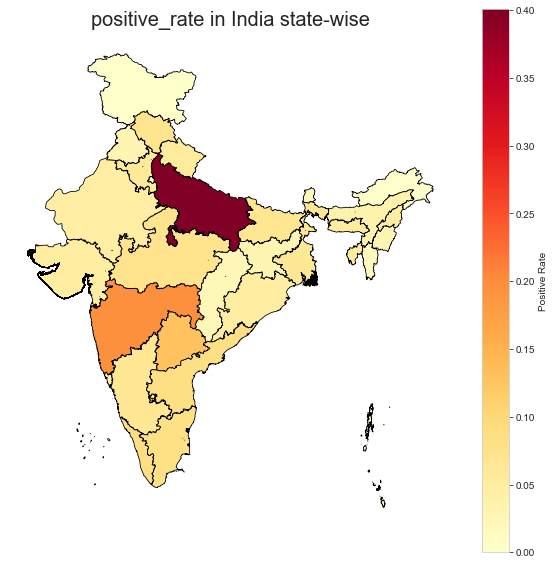

In [12]:
merged4= map_df.set_index('st_nm').join(df9.set_index('State'))
merged4['positive_rate'] = merged4['positive_rate'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('positive_rate in India state-wise', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged4.plot(column='positive_rate',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Positive Rate"})
plt.savefig("D:\doc photos\Camera Roll\pic2.png")

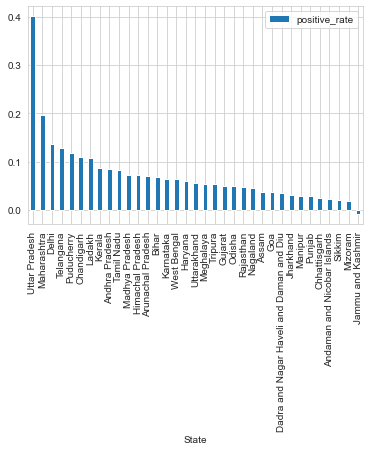

In [13]:
ax = df10.plot.bar(x='State', y='positive_rate', rot=90)
plt.savefig("D:\doc photos\Camera Roll\pic1.png", dpi=300)

# Covid-19 Vaccine Data Analysis Statewise

In [14]:
df=pd.read_csv("D:\Documents\covid_vaccine_statewise.csv")
df

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df1=df[df['State']=="India"]
df1

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,11/08/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,12/08/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,13/08/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,14/08/2021,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df1.isnull().sum()

Updated On                               0
State                                    0
Total Doses Administered                 6
Sessions                                 6
 Sites                                   6
First Dose Administered                  6
Second Dose Administered                 6
Male (Doses Administered)              166
Female (Doses Administered)            166
Transgender (Doses Administered)       166
 Covaxin (Doses Administered)            6
CoviShield (Doses Administered)          6
Sputnik V (Doses Administered)         131
AEFI                                    65
18-44 Years (Doses Administered)       166
45-60 Years (Doses Administered)       166
60+ Years (Doses Administered)         166
18-44 Years(Individuals Vaccinated)    111
45-60 Years(Individuals Vaccinated)    111
60+ Years(Individuals Vaccinated)      111
Male(Individuals Vaccinated)            52
Female(Individuals Vaccinated)          52
Transgender(Individuals Vaccinated)     52
Total Indiv

In [17]:
df_india1=df1[['Updated On','Total Doses Administered','First Dose Administered','Second Dose Administered']]
df_india1

,Updated On,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,48276.0,48276.0,0.0
1,17/01/2021,58604.0,58604.0,0.0
2,18/01/2021,99449.0,99449.0,0.0
3,19/01/2021,195525.0,195525.0,0.0
4,20/01/2021,251280.0,251280.0,0.0
...,...,...,...,...
207,11/08/2021,NaN,NaN,NaN
208,12/08/2021,NaN,NaN,NaN
209,13/08/2021,NaN,NaN,NaN
210,14/08/2021,NaN,NaN,NaN


In [18]:
df_india=df_india1.dropna()
df_india

,Updated On,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,48276.0,48276.0,0.0
1,17/01/2021,58604.0,58604.0,0.0
2,18/01/2021,99449.0,99449.0,0.0
3,19/01/2021,195525.0,195525.0,0.0
4,20/01/2021,251280.0,251280.0,0.0
...,...,...,...,...
201,05/08/2021,490760938.0,382658786.0,108102152.0
202,06/08/2021,500087070.0,390344882.0,109742188.0
203,07/08/2021,505787038.0,394599261.0,111187777.0
204,08/08/2021,507727903.0,395961470.0,111766433.0


In [19]:
df_india2=df_india.iloc[[0,16,45,75,105,136,166,197, 205]]
df_india2

,Updated On,Total Doses Administered,First Dose Administered,Second Dose Administered
0,16/01/2021,48276.0,48276.0,0.0
16,01/02/2021,3350265.0,3350265.0,0.0
45,02/03/2021,14533954.0,11886320.0,2647634.0
75,01/04/2021,66361722.0,57443466.0,8918256.0
105,01/05/2021,153626325.0,126328970.0,27297355.0
136,01/06/2021,214314522.0,170640412.0,43674110.0
166,01/07/2021,334913220.0,275842378.0,59070842.0
197,01/08/2021,467769865.0,365110984.0,102658881.0
205,09/08/2021,513228400.0,400150406.0,113077994.0


In [20]:
df_india2 = df_india2.set_index("Updated On")


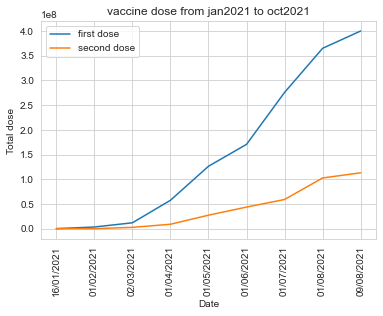

In [21]:
plt.plot(df_india2["First Dose Administered"],label='first dose')
plt.plot(df_india2["Second Dose Administered"],label='second dose')
plt.xlabel("Date")
plt.ylabel("Total dose ")
plt.title("vaccine dose from jan2021 to oct2021")
plt.xticks(rotation=90) 
plt.legend()
plt.show()


In [22]:
df_gen=df1[['Updated On','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)']].dropna()
df_gen1=df_gen.iloc[[0,16,45,75,105,136, 159]]
df_gen1

,Updated On,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated)
0,16/01/2021,23757.0,24517.0,2.0
16,01/02/2021,1152344.0,2197431.0,490.0
45,02/03/2021,6462436.0,5422470.0,1414.0
75,01/04/2021,30321468.0,27115615.0,6383.0
105,01/05/2021,65972485.0,60339903.0,16582.0
136,01/06/2021,91381749.0,79231870.0,26793.0
159,24/06/2021,134941971.0,115668447.0,46462.0


In [23]:
df_gen1 = df_gen1.set_index("Updated On")

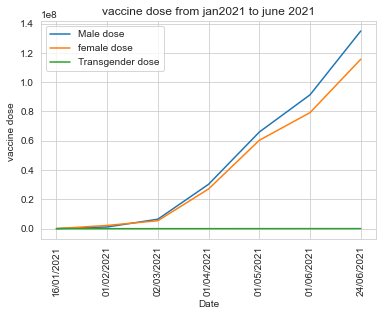

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(df_gen1["Male(Individuals Vaccinated)"],label='Male dose')
plt.plot(df_gen1["Female(Individuals Vaccinated)"],label='female dose')
plt.plot(df_gen1["Transgender(Individuals Vaccinated)"],label='Transgender dose')
plt.xlabel("Date")
plt.ylabel("vaccine dose ")
plt.title("vaccine dose from jan2021 to june 2021")
plt.xticks(rotation=90) 
plt.legend()
plt.show()
plt.savefig("D:\doc photos\Camera Roll\pic8.png")

# Total Vaccine in india Statewise

In [25]:
df3=df[df['Updated On']=='09/08/2021']
df6=df[df['Updated On']=='24/06/2021']
df4=df3[['State','Total Doses Administered']]
df41=df3[['State','First Dose Administered']]

df41=df41.drop(df41.index[0]).reset_index()
df41=df41.drop(['index'],axis=1)
df4

,State,Total Doses Administered
205,India,513228400.0
417,Andaman and Nicobar Islands,310643.0
629,Andhra Pradesh,23842895.0
841,Arunachal Pradesh,879094.0
1053,Assam,12703870.0
1265,Bihar,27834939.0
1477,Chandigarh,923819.0
1689,Chhattisgarh,11769177.0
1901,Dadra and Nagar Haveli and Daman and Diu,665221.0
2113,Delhi,10836082.0


In [26]:
data=pd.read_csv("D:\downloads\data ...csv")
data1=pd.concat([df41,data],axis=1)
data1['vaccine_percentage']=data1['First Dose Administered']*100/data1['Population']
data2 = data1.drop(data1.columns[[1,3]],axis = 1)
data3 = data2.loc[:,~data2.columns.duplicated()]

In [27]:
l5=data2['vaccine_percentage'].unique()
vaccine_range1=[]
for i in l5:
    if i>0 and i<20:
        vaccine_range1.append(10)
    elif i>=20 and i<40:
        vaccine_range1.append(30)    
    elif i>=40 and i<60:
        vaccine_range1.append(50)
    elif i>=60 and i<80:
        vaccine_range1.append(70)  
    else: vaccine_range1.append(80) 
data2['vaccine_range1']= vaccine_range1   

data3

,State,vaccine_percentage
0,Andaman and Nicobar Islands,56.767416
1,Andhra Pradesh,35.694929
2,Arunachal Pradesh,50.044192
3,Assam,33.632749
4,Bihar,22.430638
5,Chandigarh,66.349424
6,Chhattisgarh,35.942105
7,Dadra and Nagar Haveli and Daman and Diu,93.882089
8,Delhi,46.673657
9,Goa,75.033132


In [28]:
merged7= map_df.set_index('st_nm').join(data3.set_index('State'))
merged7['vaccine_percentage'] = merged7['vaccine_percentage'].replace(np.nan, 0)

In [29]:
import sklearn
import kmeans1d

x = df4['Total Doses Administered']
k = 5

clusters, centroids = kmeans1d.cluster(x, k)

print(clusters) 
print(centroids) 

[4, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 3, 0, 2]
[1909344.8235294118, 13872930.888888888, 31358022.0, 50800545.0, 513228400.0]


In [30]:
#l2=df4['Total Doses Administered'].unique()
vaccine_range=[]
#for i in clusters:
    #if i>0 and i<10000000:
        #vaccine_range.append(10000000)
    #elif i>=10000000 and i<20000000:
        #vaccine_range.append(20000000)    
    #elif i>=20000000 and i<30000000:
        #vaccine_range.append(30000000)
    #elif i>=30000000 and i<40000000:
        #vaccine_range.append(40000000)  
    #else: vaccine_range.append(50000000) 
#      
 
for i in clusters:
    if i==4:
        vaccine_range.append(513228400.0)
    elif i==3:
        vaccine_range.append(50800545.0)    
    elif i==2:
        vaccine_range.append(31358022.0)    
    elif i==1:
        vaccine_range.append(13872930.88)    
    elif i==0:
        vaccine_range.append(1909344.82)    
df4['vaccine_range']= vaccine_range            

In [31]:
merged = map_df.set_index('st_nm').join(df4.set_index('State'))
merged['vaccine_range'] = merged['vaccine_range'].replace(np.nan, 0)

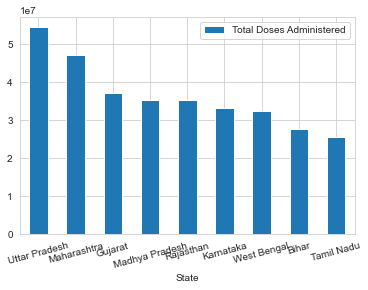

In [32]:
df11=df4.sort_values(by='Total Doses Administered', ascending=False).head(10)
df11=df11.drop(df11.index[0])
ax = df11.plot.bar(x='State', y='Total Doses Administered', rot=15)
plt.savefig("D:\doc photos\Camera Roll\pic4.png")

<AxesSubplot:title={'center':'Number of total vaccine in India state-wise till Aug 2021'}>

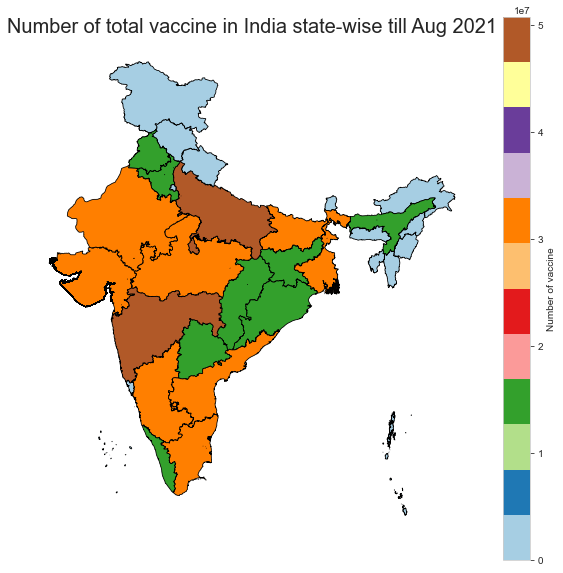

In [33]:

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of total vaccine in India state-wise till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged.plot(column='vaccine_range',cmap='Paired', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of vaccine"})

# 18-44 year Age group Vaccine Data Statewise

In [34]:
df5=df6[['State','18-44 Years(Individuals Vaccinated)']]

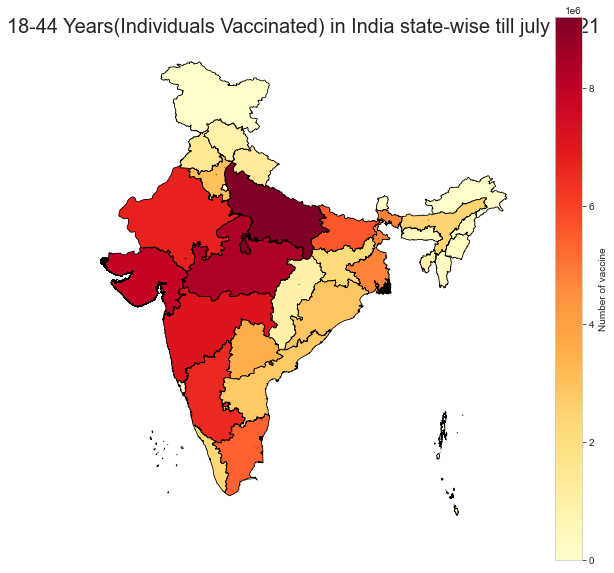

In [35]:
merged1= map_df.set_index('st_nm').join(df5.set_index('State'))
merged1['18-44 Years(Individuals Vaccinated)'] = merged1['18-44 Years(Individuals Vaccinated)'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('18-44 Years(Individuals Vaccinated) in India state-wise till july 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged1.plot(column='18-44 Years(Individuals Vaccinated)',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of vaccine"})
plt.savefig("D:\doc photos\Camera Roll\pic5.png")

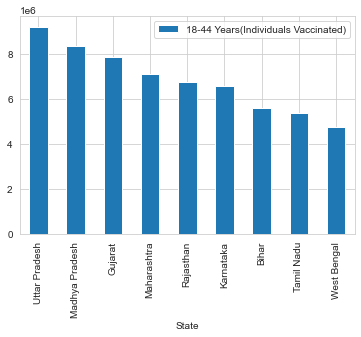

In [36]:
df12=df5.sort_values(by='18-44 Years(Individuals Vaccinated)', ascending=False).head(10)
df12=df12.drop(df12.index[0])
ax = df12.plot.bar(x='State', y='18-44 Years(Individuals Vaccinated)', rot=90)


# Female Vaccine Data Statewise

In [37]:
df8=df3[['State','Female (Doses Administered)']]
df8

,State,Female (Doses Administered)
205,India,239518609.0
417,Andaman and Nicobar Islands,145049.0
629,Andhra Pradesh,12986129.0
841,Arunachal Pradesh,391993.0
1053,Assam,5962985.0
1265,Bihar,12902990.0
1477,Chandigarh,399424.0
1689,Chhattisgarh,5851349.0
1901,Dadra and Nagar Haveli and Daman and Diu,220429.0
2113,Delhi,4605508.0


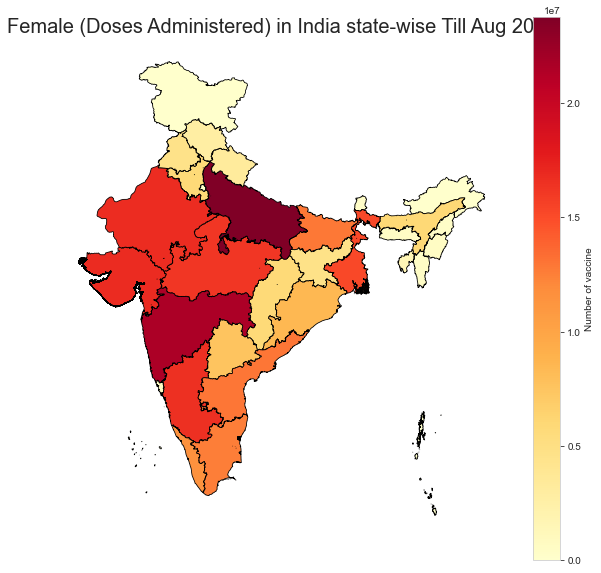

In [38]:
merged3= map_df.set_index('st_nm').join(df8.set_index('State'))
merged3['Female (Doses Administered)'] = merged3['Female (Doses Administered)'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Female (Doses Administered) in India state-wise Till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged3.plot(column='Female (Doses Administered)',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of vaccine"})
plt.savefig("D:\doc photos\Camera Roll\pic6.png")

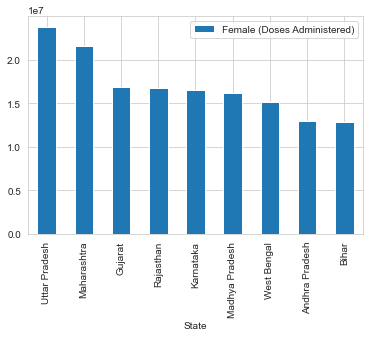

In [39]:
df14=df8.sort_values(by='Female (Doses Administered)', ascending=False).head(10)
df14=df14.drop(df14.index[0])
ax = df14.plot.bar(x='State', y='Female (Doses Administered)', rot=90)

# Male Vaccine Data Statewise

In [40]:
df9=df3[['State','Male (Doses Administered)']]
df9

,State,Male (Doses Administered)
205,India,270163622.0
417,Andaman and Nicobar Islands,165554.0
629,Andhra Pradesh,10852932.0
841,Arunachal Pradesh,486874.0
1053,Assam,6739027.0
1265,Bihar,14926420.0
1477,Chandigarh,524263.0
1689,Chhattisgarh,5916437.0
1901,Dadra and Nagar Haveli and Daman and Diu,444656.0
2113,Delhi,6228216.0


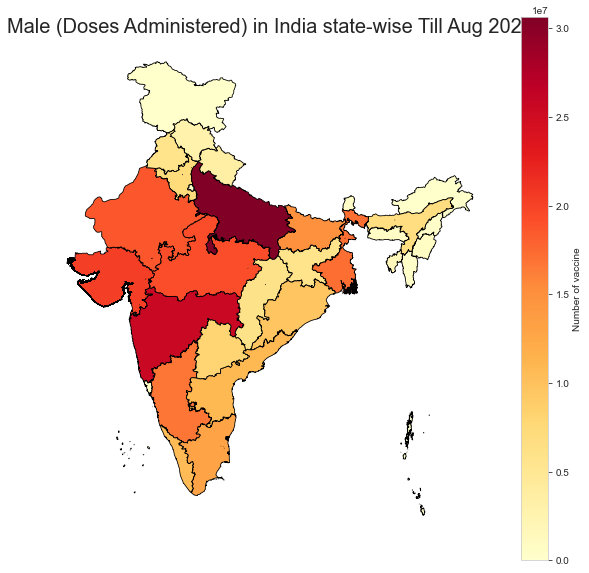

In [41]:
merged4= map_df.set_index('st_nm').join(df9.set_index('State'))
merged4['Male (Doses Administered)'] = merged4['Male (Doses Administered)'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Male (Doses Administered) in India state-wise Till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged4.plot(column='Male (Doses Administered)',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of vaccine"})
plt.savefig("D:\doc photos\Camera Roll\pic9.png")

In [42]:
df15=df9.sort_values(by='Male (Doses Administered)', ascending=False).head(10)
df15=df15.drop(df15.index[0])


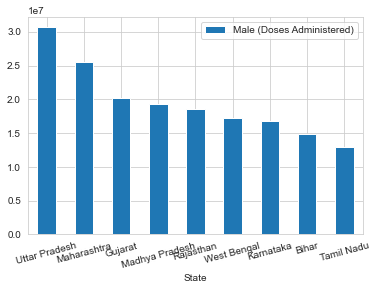

In [43]:
ax = df15.plot.bar(x='State', y='Male (Doses Administered)', rot=15)
plt.savefig("D:\doc photos\Camera Roll\pic10.png")

In [44]:
df_mob=pd.read_csv("D:\downloads\mobility2021.csv")

In [45]:
dfmob1=df_mob.drop(['country_region_code','metro_area','iso_3166_2_code','census_fips_code','place_id',],axis='columns')

In [46]:
dfmob1.isnull().sum()

country_region                                            0
sub_region_1                                            365
sub_region_2                                          13505
date                                                      0
retail_and_recreation_percent_change_from_baseline    14531
grocery_and_pharmacy_percent_change_from_baseline     31447
parks_percent_change_from_baseline                    11487
transit_stations_percent_change_from_baseline         12931
workplaces_percent_change_from_baseline                 361
residential_percent_change_from_baseline              13555
dtype: int64

In [47]:
dfmob=dfmob1[dfmob1.sub_region_2.isnull()]
dfmob

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,India,NaN,NaN,01-01-2021,-23.0,11.0,-6.0,-11.0,-29.0,14.0
1,India,NaN,NaN,02-01-2021,-31.0,7.0,-19.0,-10.0,-8.0,11.0
2,India,NaN,NaN,03-01-2021,-32.0,1.0,-13.0,-5.0,0.0,10.0
3,India,NaN,NaN,04-01-2021,-28.0,9.0,-17.0,-9.0,-16.0,12.0
4,India,NaN,NaN,05-01-2021,-29.0,7.0,-18.0,-10.0,-19.0,12.0
...,...,...,...,...,...,...,...,...,...,...
237144,India,West Bengal,NaN,27-12-2021,-1.0,33.0,17.0,10.0,-2.0,7.0
237145,India,West Bengal,NaN,28-12-2021,-1.0,32.0,18.0,8.0,-3.0,8.0
237146,India,West Bengal,NaN,29-12-2021,-2.0,35.0,15.0,14.0,5.0,6.0
237147,India,West Bengal,NaN,30-12-2021,-2.0,38.0,16.0,12.0,5.0,8.0


In [48]:
dfmob2=dfmob[dfmob.sub_region_1.notnull()]
dfmob2

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
365,India,Andaman and Nicobar Islands,NaN,01-01-2021,-5.0,NaN,-13.0,50.0,10.0,13.0
366,India,Andaman and Nicobar Islands,NaN,02-01-2021,5.0,NaN,-16.0,66.0,30.0,11.0
367,India,Andaman and Nicobar Islands,NaN,03-01-2021,-5.0,NaN,3.0,57.0,27.0,10.0
368,India,Andaman and Nicobar Islands,NaN,04-01-2021,2.0,NaN,-18.0,67.0,28.0,10.0
369,India,Andaman and Nicobar Islands,NaN,05-01-2021,-5.0,NaN,-17.0,63.0,24.0,10.0
...,...,...,...,...,...,...,...,...,...,...
237144,India,West Bengal,NaN,27-12-2021,-1.0,33.0,17.0,10.0,-2.0,7.0
237145,India,West Bengal,NaN,28-12-2021,-1.0,32.0,18.0,8.0,-3.0,8.0
237146,India,West Bengal,NaN,29-12-2021,-2.0,35.0,15.0,14.0,5.0,6.0
237147,India,West Bengal,NaN,30-12-2021,-2.0,38.0,16.0,12.0,5.0,8.0


In [49]:
l=dfmob2['sub_region_1'].unique()
l

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [50]:
mobility_retail=[]
for state in l:
    df_state=dfmob2[dfmob2['sub_region_1']==state].reset_index().iloc[15:212]
    mobility_retail.append(df_state['transit_stations_percent_change_from_baseline'].mean())
    
   

In [51]:
len(mobility_retail),len(l)

(36, 36)

In [52]:
zipped = list(zip(l,mobility_retail))
df_mobility=pd.DataFrame(zipped, columns=['State', 'mobility'])
df_mobility 

,State,mobility
0,Andaman and Nicobar Islands,28.416244
1,Andhra Pradesh,-16.116751
2,Arunachal Pradesh,-31.852792
3,Assam,-21.532995
4,Bihar,-3.563452
5,Chandigarh,-15.786802
6,Chhattisgarh,-23.827411
7,Dadra and Nagar Haveli,1.896552
8,Daman and Diu,-18.873096
9,Delhi,-33.781726


In [53]:
l1=df_mobility['mobility'].unique()
mobility2=[]
for i in l1:
    if i>-50 and i<-35:
        mobility2.append(-40)
    elif i>=-35 and i<-25:
        mobility2.append(-30)
    elif i>=-25 and i<-20:
        mobility2.append(-22)
    elif i>=-20 and i<-10:
        mobility2.append(-15)     
    elif i>=-10 and i<1:
        mobility2.append(-8) 
    else: mobility2.append(0) 
df_mobility['mobility_range']=mobility2        
df_mobility       

,State,mobility,mobility_range
0,Andaman and Nicobar Islands,28.416244,0
1,Andhra Pradesh,-16.116751,-15
2,Arunachal Pradesh,-31.852792,-30
3,Assam,-21.532995,-22
4,Bihar,-3.563452,-8
5,Chandigarh,-15.786802,-15
6,Chhattisgarh,-23.827411,-22
7,Dadra and Nagar Haveli,1.896552,0
8,Daman and Diu,-18.873096,-15
9,Delhi,-33.781726,-30


<AxesSubplot:title={'center':'Percetage vaccine India state-wise till Aug 2021'}>

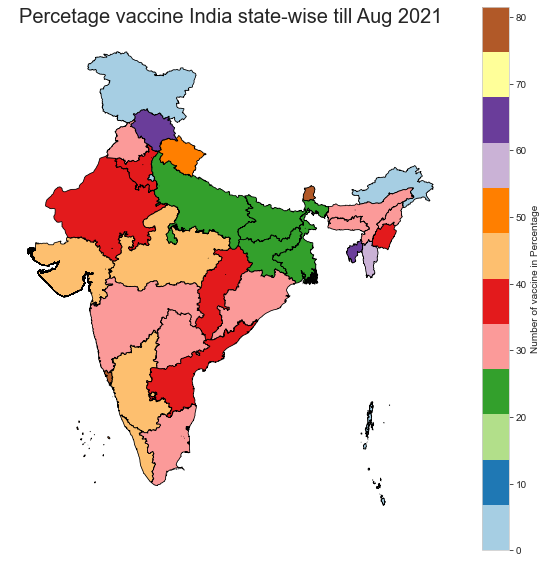

In [60]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Percetage vaccine India state-wise till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged7.plot(column='vaccine_percentage',cmap='Paired', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of vaccine in Percentage"})

<AxesSubplot:title={'center':'transport  mobility in India state-wise Till Aug 2021'}>

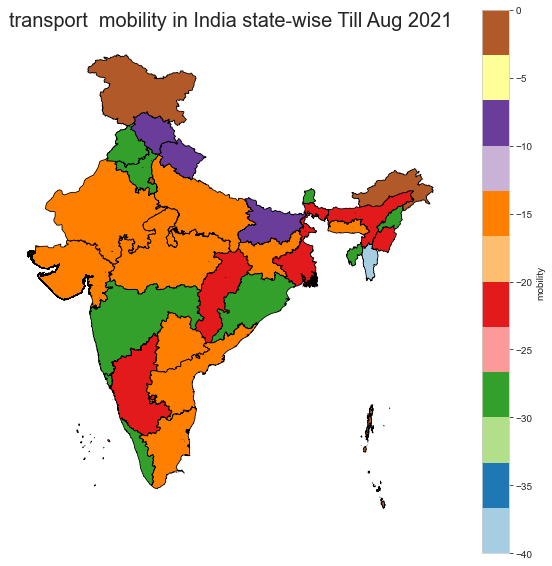

In [55]:
merged5= map_df.set_index('st_nm').join(df_mobility.set_index('State'))
merged5['mobility_range'] = merged5['mobility_range'].replace(np.nan, 0)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('transport  mobility in India state-wise Till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged5.plot(column='mobility_range',cmap='Paired', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "mobility"})

In [56]:
mobility_grocery=[]
for state in l:
    df_state=dfmob2[dfmob2['sub_region_1']==state].reset_index().iloc[15:221]
    mobility_grocery.append(df_state['grocery_and_pharmacy_percent_change_from_baseline'].mean())

In [57]:
zipped1 = list(zip(l,mobility_grocery))
df_mobility1=pd.DataFrame(zipped1, columns=['State', 'mobility1'])
df_mobility1

,State,mobility1
0,Andaman and Nicobar Islands,NaN
1,Andhra Pradesh,22.422330
2,Arunachal Pradesh,3.868932
3,Assam,-5.145631
4,Bihar,27.538835
5,Chandigarh,-17.412621
6,Chhattisgarh,5.854369
7,Dadra and Nagar Haveli,42.456311
8,Daman and Diu,-0.291262
9,Delhi,-12.728155


In [58]:
merged6= map_df.set_index('st_nm').join(df_mobility1.set_index('State'))
merged6['mobility1'] = merged6['mobility1'].replace(np.nan, 0)
merged6


,geometry,mobility1
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",0.000000
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",0.000000
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",-5.145631
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",27.538835
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",-17.412621
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",5.854369
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",0.000000
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",0.000000
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",-8.364078


<AxesSubplot:title={'center':'pharma mobility in India state-wise Till Aug 2021'}>

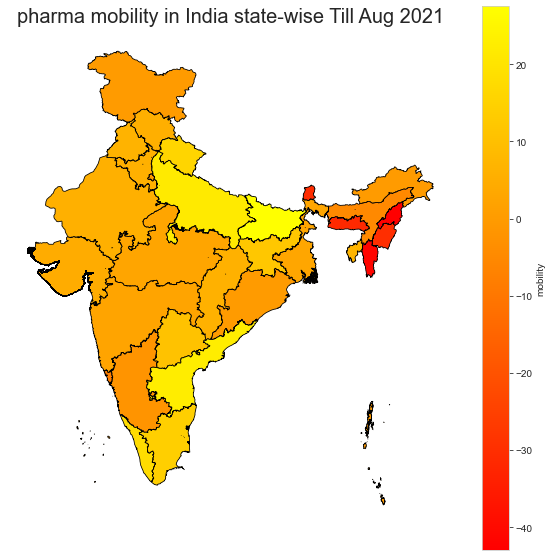

In [59]:

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('pharma mobility in India state-wise Till Aug 2021', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged6.plot(column='mobility1',cmap='autumn', linewidth=0.8, ax=ax, edgecolor='0',
            legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "mobility"})